In [11]:
# coding: utf-8
%matplotlib inline
import xarray as xr
from functools import partial
import vcm
import matplotlib.pyplot as plt


GRID_VARS = ['lon', 'lat', 'lonb', 'latb', 'time', 'area']
rename_dims = {'x': 'grid_xt', 'y': 'grid_yt', 'rank': 'tile'}


def open_ds():
    grid = xr.open_mfdataset('rundir/atmos_dt_atmos.tile?.nc', concat_dim='tile', combine='nested')
    sfc = xr.open_mfdataset('rundir/sfc_dt_atmos.tile?.nc', concat_dim='tile', combine='nested')
    ds = xr.open_zarr('test.zarr').rename(rename_dims).merge(grid).merge(sfc)
    return ds
ds = open_ds()


In [12]:
HORZ_DIMS = ['grid_xt', 'grid_yt', 'tile']

def global_avg(da, area):
    return (da * area).mean(HORZ_DIMS).compute() / area.mean(HORZ_DIMS)


In [13]:
global_avg_ds = global_avg(ds, ds.area)

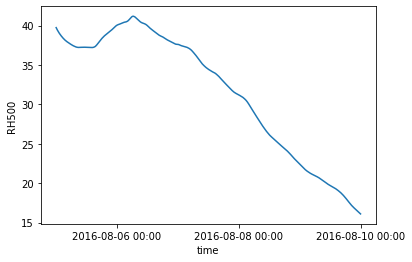

In [14]:
global_avg_ds.RH500.plot()

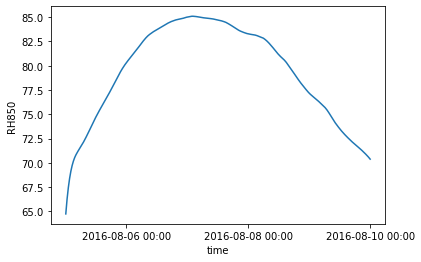

In [15]:
global_avg_ds.RH850.plot()

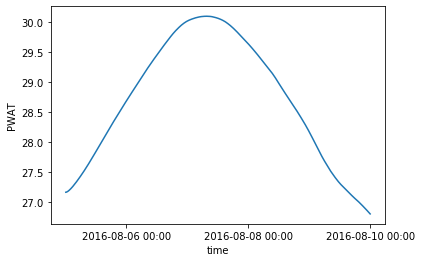

In [16]:
global_avg_ds.PWAT.plot()

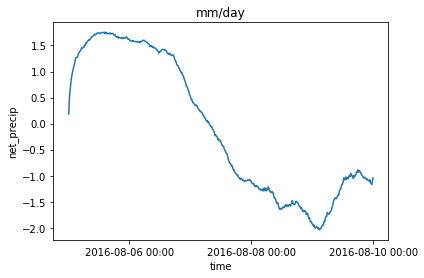

In [17]:
(global_avg_ds.net_precip*86400).plot()
plt.title("mm/day");

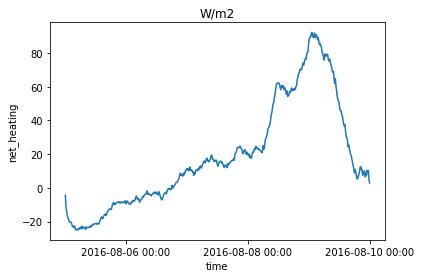

In [18]:
global_avg_ds.net_heating.plot()
plt.title('W/m2');

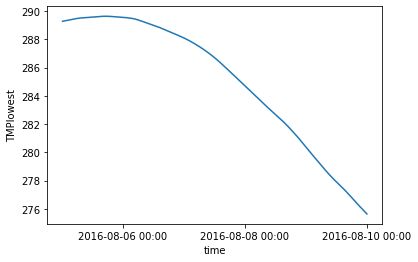

In [24]:
global_avg_ds.TMPlowest.plot()